<a href="https://colab.research.google.com/github/aribashaikh870-droid/student-performance-prediction/blob/main/student_performance_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,student_id,study_hours,attendance,assignment_score,previous_marks,final_score
0,1,2,60,55,50,58
1,2,3,65,58,55,62
2,3,4,70,60,60,66
3,4,5,72,62,63,69
4,5,6,75,65,65,72


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   student_id        30 non-null     int64
 1   study_hours       30 non-null     int64
 2   attendance        30 non-null     int64
 3   assignment_score  30 non-null     int64
 4   previous_marks    30 non-null     int64
 5   final_score       30 non-null     int64
dtypes: int64(6)
memory usage: 1.5 KB


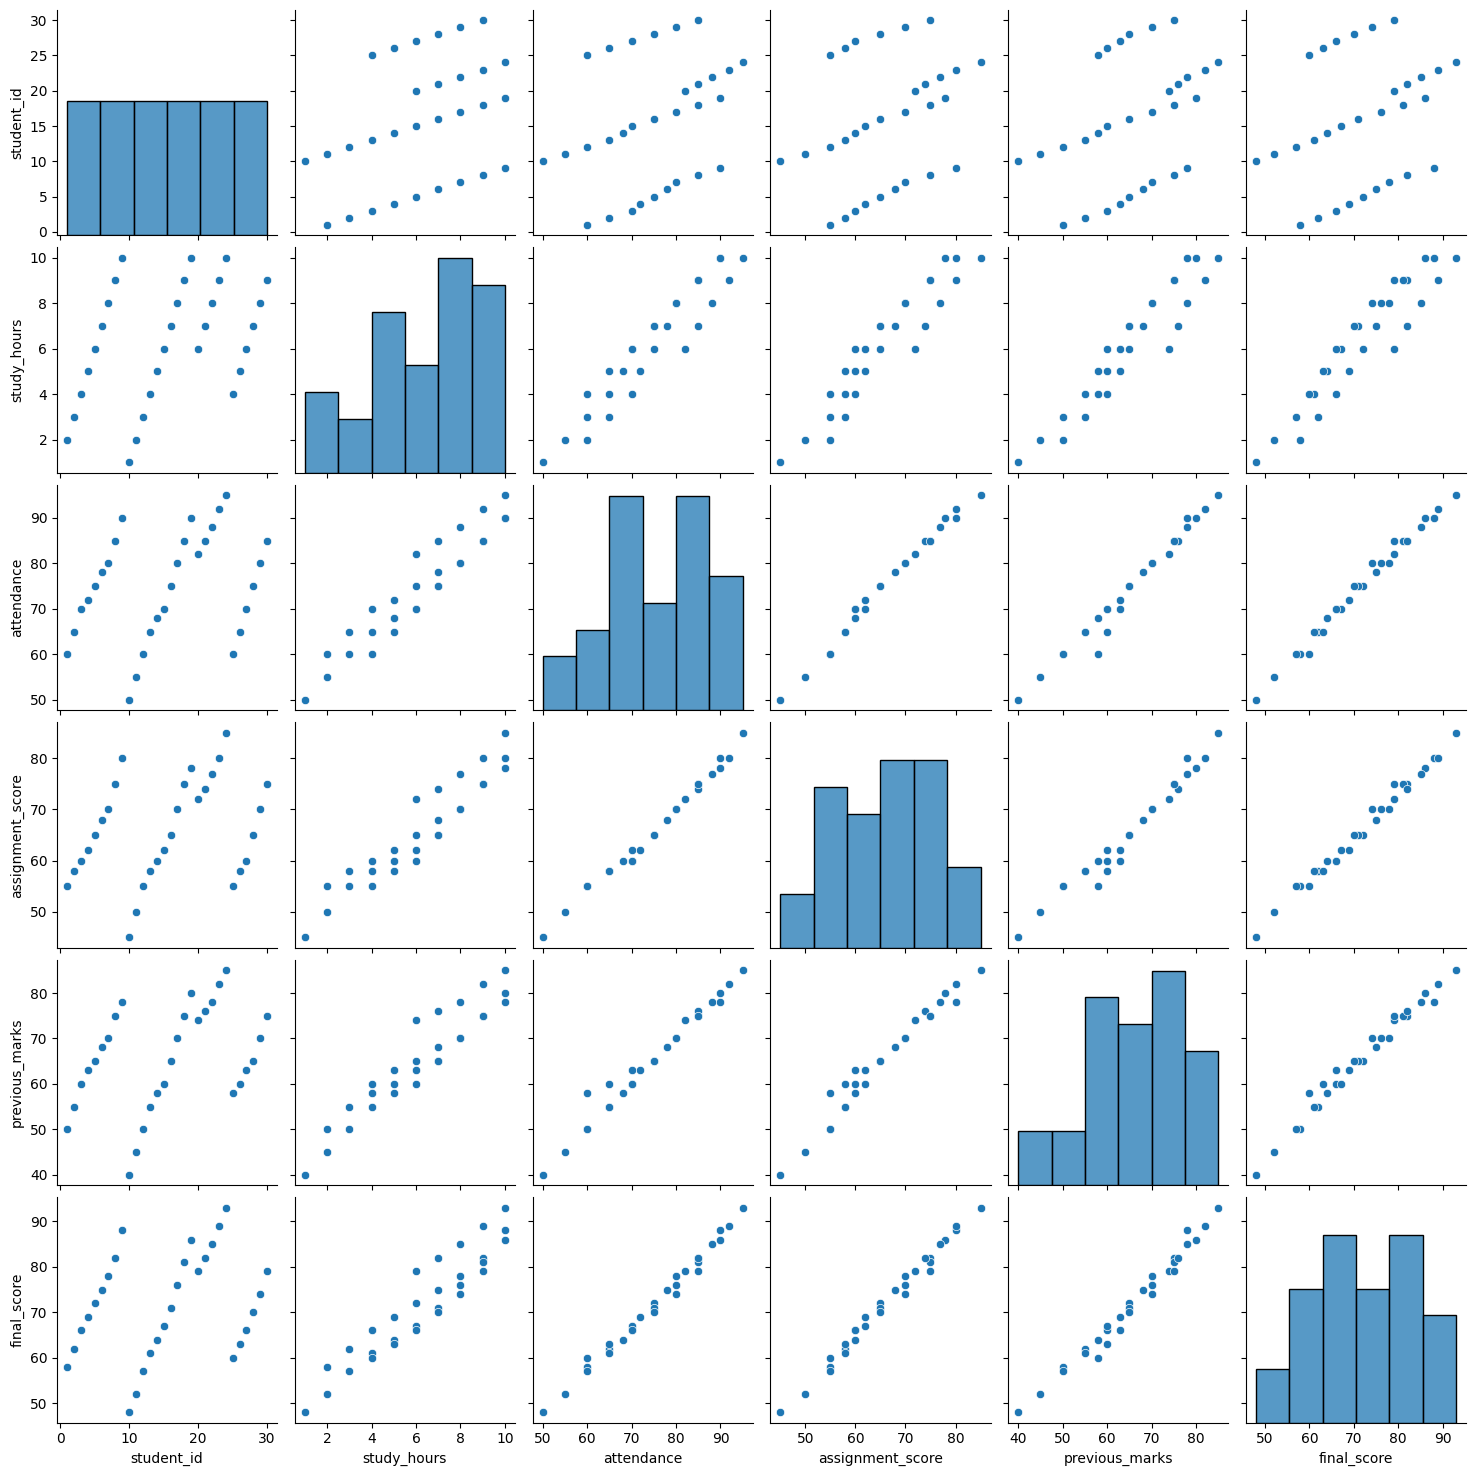

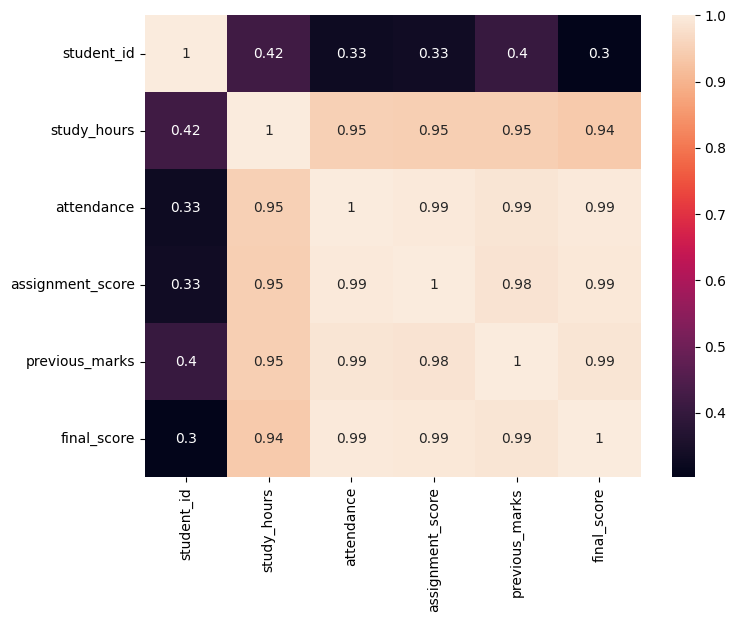

In [19]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/student_performance-1.csv')

# Display the first 5 rows of the DataFrame
display(df.head())
## Data Cleaning
df.info()
df.isnull().sum()
df.describe()
## Exploratory data analysis(EDA)
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df)
plt.show()
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

EDA helps understand relationships between features and the target variable  

EDA helps understand relationship between features and target variable

feature selection and model traning

In [20]:
x = df[['study_hours','attendance','assignment_score','previous_marks']]
y = df['final_score']


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state = 42)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)



evaluate the model

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error:",mean_squared_error(y_test,y_pred))
print("R2 score:", r2_score(y_test,y_pred))


Mean squared error: 1.4192141897121247
R2 score: 0.9934438969806703


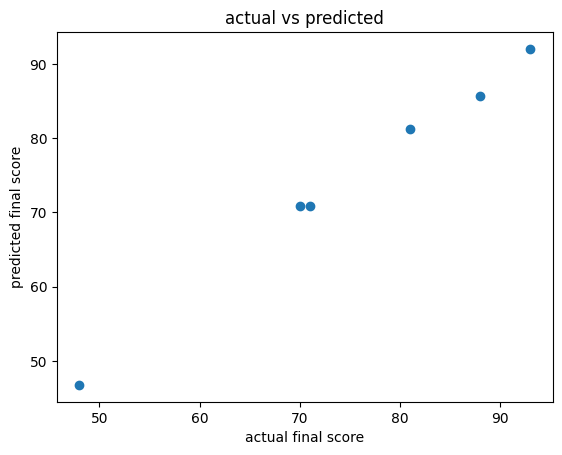

In [23]:
plt.scatter(y_test,y_pred)
plt.xlabel("actual final score")
plt.ylabel("predicted final score")
plt.title("actual vs predicted")
plt.show()

In [24]:
import joblib
joblib.dump(model,"student_performance_model.pkl")

['student_performance_model.pkl']